# sugar_corr_gene_exp_pre_4heatmap1

In [2]:
import pandas as pd
gene_TF_raw = pd.read_excel("热图1.xlsx", sheet_name=0, index_col=0)
gene_TF = gene_TF_raw.copy()
del gene_TF["ID"]

/Users/yuanzan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
gene_TF_meta = pd.DataFrame(gene_TF.columns)
gene_TF_meta.columns = ["sample"]
gene_TF_meta.index = gene_TF_meta["sample"]
gene_TF_meta['condition_HAG'] = gene_TF_meta["sample"].str.split("h-", expand=True)[0]

import re
def get_condition(series):
    return re.split("(\d+)", series['condition_HAG'])[0]

def get_HAG(series):
    return re.split("(\d+)", series['condition_HAG'])[1]

gene_TF_meta['Condition'] = gene_TF_meta.apply(get_condition, axis=1)
gene_TF_meta['HAG'] = gene_TF_meta.apply(get_HAG, axis=1)

gene_TF_meta = gene_TF_meta[['condition_HAG', 'Condition', 'HAG']]



gene_TF['gene'] = gene_TF.index
gene_TF = gene_TF.melt(id_vars=['gene'])
gene_TF['condition_HAG'] = gene_TF_meta.loc[gene_TF['variable'], "condition_HAG"].to_list()
gene_TF = gene_TF.groupby(['gene', 'condition_HAG']).mean()["value"].reset_index()
gene_TF = pd.crosstab(gene_TF['gene'], gene_TF['condition_HAG'], aggfunc='max',values=gene_TF['value'].to_list())

<ipython-input-3-470d327d358b>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_TF = gene_TF.groupby(['gene', 'condition_HAG']).mean()["value"].reset_index()


In [4]:
gene_TF_meta2 = pd.DataFrame(gene_TF.columns)
gene_TF_meta2.columns = ["sample"]

def get_condition2(series):
    return re.split("(\d+)", series['sample'])[0]

def get_HAG2(series):
    return re.split("(\d+)", series['sample'])[1]

gene_TF_meta2['Condition'] = gene_TF_meta2.apply(get_condition2, axis=1)
gene_TF_meta2['HAG'] = gene_TF_meta2.apply(get_HAG2, axis=1)
gene_TF_meta2['HAG'] = gene_TF_meta2['HAG'].astype(int)
gene_TF_meta2 = gene_TF_meta2.sort_values(['Condition', 'HAG'])

gene_TF = gene_TF.loc[gene_TF_raw.index, gene_TF_meta2['sample']]

In [5]:
gene_TF.to_csv('heatmap1.csv', sep="\t")
gene_TF_meta2.to_csv('heatmap1_meta.csv', sep="\t")

### other useless code

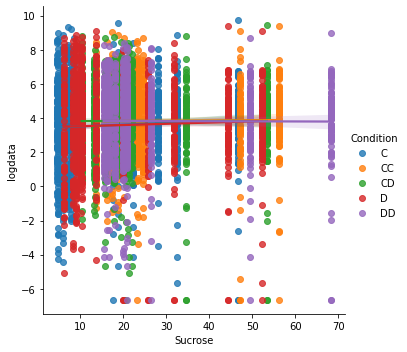

In [7]:
corr_df = gene_TF.T
corr_df['sample'] = corr_df.index
corr_df = corr_df.melt(id_vars=['Sucrose', 'sample'])

gene_TF_meta3 = gene_TF_meta2.copy()
gene_TF_meta3.index = gene_TF_meta3["sample"]
corr_df['Condition'] = gene_TF_meta3.loc[corr_df["sample"], "Condition"].to_list()

import numpy as np
corr_df['logdata'] = np.log2(corr_df['value']+0.01)

import seaborn as sns

sns.lmplot(x="Sucrose",
           y="logdata",
           hue="Condition",
           #lowess=True,
           data=corr_df)